### import libraries

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

## load dataset

In [5]:
data=pd.read_csv("C:/Users/dell/Downloads/advertising.csv")
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [7]:
data.shape

(200, 4)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## conclusion
>- TV advertising seems to have the highest mean and maximum spend
>- Radio advertising has a lower mean and maximum, which could suggest it's less impactful
>- Newspaper ads have a significant range
- TV appears to be the biggest spender and potentially the most effective, while Radio is more modest. Newspaper sits in between but shows potential with its high max. 

## data cleaning

In [29]:
pd.isnull(data).sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## exploratory analysis

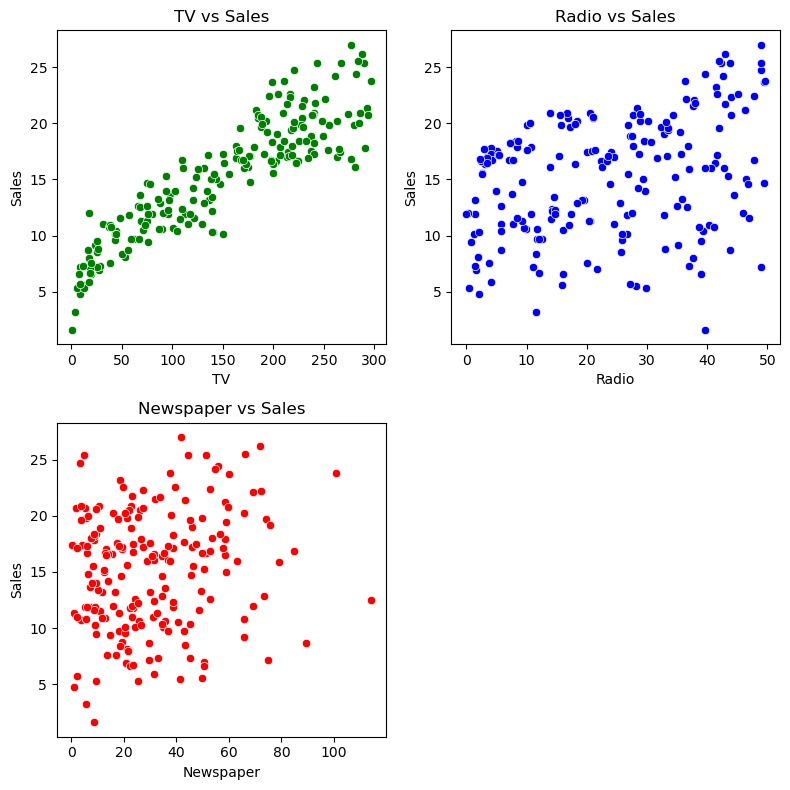

In [77]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='TV', y='Sales', data=data,color='green')
plt.title('TV vs Sales')

plt.subplot(2, 2, 2)
sns.scatterplot(x='Radio', y='Sales', data=data,color='blue')
plt.title('Radio vs Sales')

plt.subplot(2, 2, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=data,color='red')
plt.title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

## conclusion
>-  TV advertising expenditure increases, sales generally increase
>-  radio ads do contribute to sales but their impact is less significant.
>-  increased spending on newspaper ads doesn’t strongly correlate with higher sales.



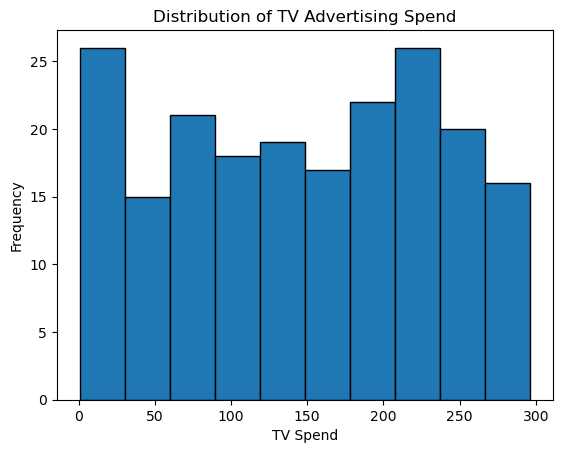

In [61]:
tv_spend = data['TV']
plt.hist(tv_spend, bins=10, edgecolor='black')
plt.title('Distribution of TV Advertising Spend')
plt.xlabel('TV Spend')
plt.ylabel('Frequency')

plt.show()

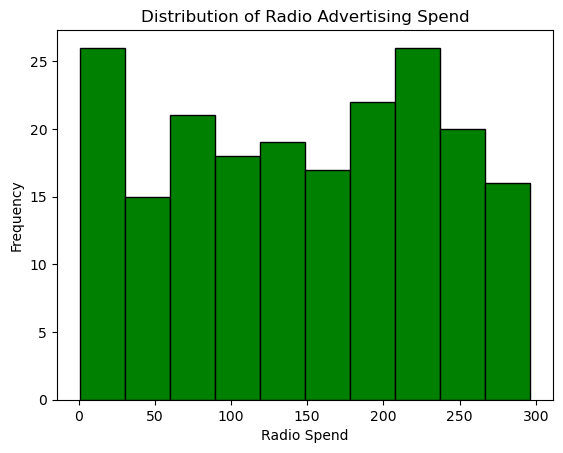

In [67]:
Radio_spend = data['Radio']
plt.hist(tv_spend,color='green',bins=10, edgecolor='black')
plt.title('Distribution of Radio Advertising Spend')
plt.xlabel('Radio Spend')
plt.ylabel('Frequency')

plt.show()

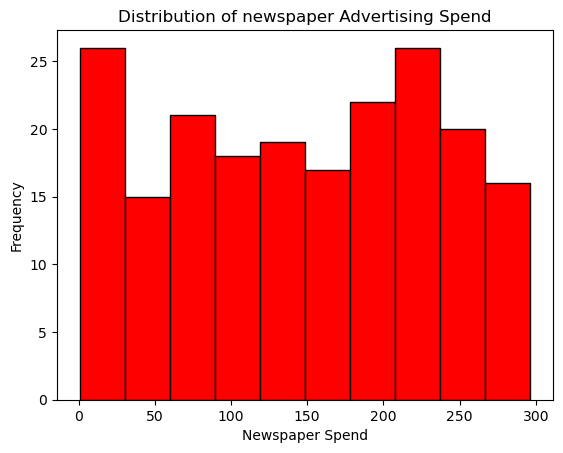

In [106]:
Newspaper_spend = data['Newspaper']
plt.hist(tv_spend,color='red',bins=10, edgecolor='black')
plt.title('Distribution of newspaper Advertising Spend')
plt.xlabel('Newspaper Spend')
plt.ylabel('Frequency')

plt.show()

## conclusion
>- TV: Most values cluster in a lower range with a few high outliers.
>- 
Radio: Even distribution, slightly skewed towards lower spend
>- Newspaper: A varied spread, with some significant high spends but many lower ones. es. 

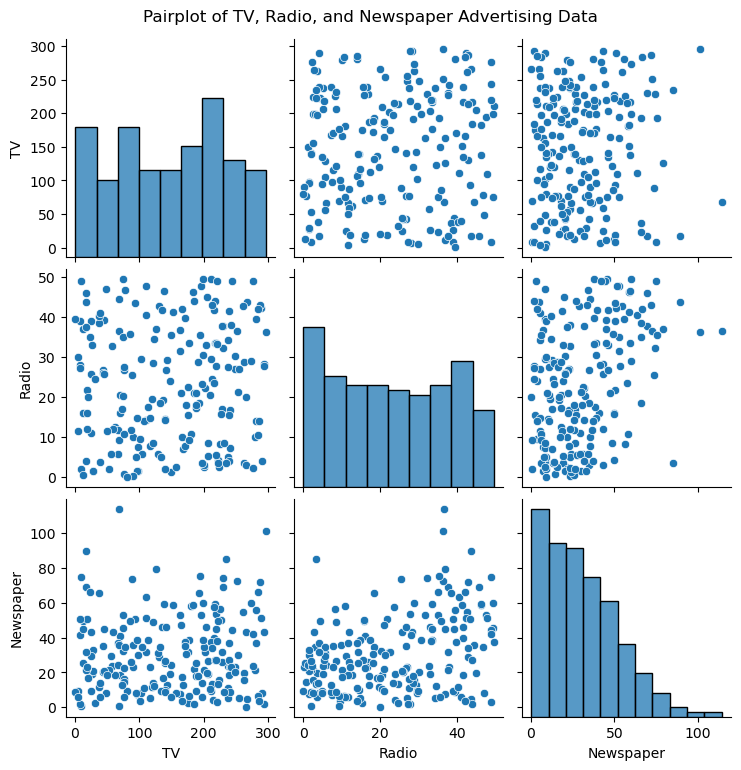

In [38]:
sns.pairplot(data[['TV', 'Radio', 'Newspaper']])
plt.suptitle('Pairplot of TV, Radio, and Newspaper Advertising Data', y=1.02)
plt.show()

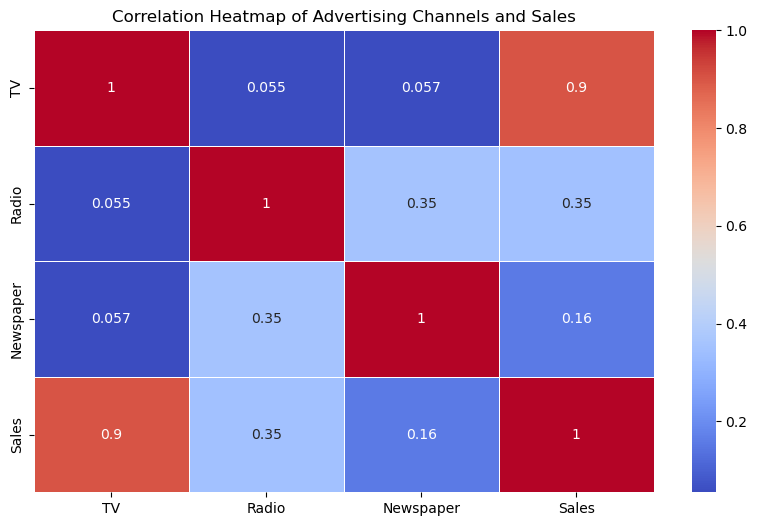

In [81]:
corr = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Advertising Channels and Sales')
plt.show()

## linear regression

In [86]:
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 04 Oct 2024   Prob (F-statistic):           8.13e-99
Time:                        13:04:30   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

## conclusion
>- TV: With a coefficient of 0.0544, TV advertising significantly boosts sales.
>- Radio: Also impactful, with a coefficient of 0.1070. Although the coefficient is higher than TV's, note the scale and spending differences.
>- Newspaper: Virtually no impact on sales, shown by its minuscule coefficient (0.0003) and high p-value (0.954).

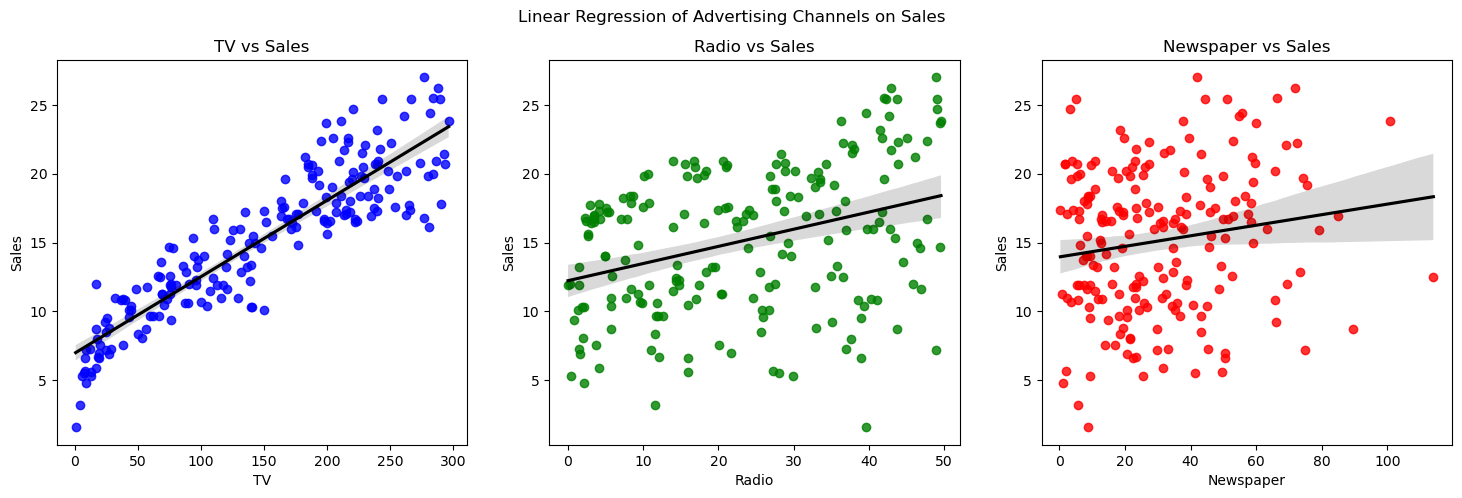

In [104]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.regplot(x='TV', y='Sales', data=data, ax=axs[0], scatter_kws={'color':'blue'}, line_kws={'color':'black'})
axs[0].set_title('TV vs Sales')

sns.regplot(x='Radio', y='Sales', data=data, ax=axs[1], scatter_kws={'color':'green'}, line_kws={'color':'black'})
axs[1].set_title('Radio vs Sales')

sns.regplot(x='Newspaper', y='Sales', data=data, ax=axs[2], scatter_kws={'color':'red'}, line_kws={'color':'black'})
axs[2].set_title('Newspaper vs Sales')

plt.suptitle('Linear Regression of Advertising Channels on Sales')
plt.show()

## conclusion
>- TV Ads: Strong, positive correlation with sales. Higher TV spending generally leads to higher sales.
>- Radio Ads: Positive correlation but weaker than TV. Radio ads do boost sales, but not as significantly.
>- Newspaper Ads: Very weak correlation. Newspaper ad spending shows minimal impact on sales.

### final conclusion
TV advertising is your best bet for driving sales, followed by Radio. Newspaper ads seem to have the least effect. Focus your budget where it counts!